In [30]:
pip install networkx pandas mlxtend networkx matplotlib numpy seaborn


   ---------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00


In [14]:
import pandas as pd

In [8]:
#loading the datasets

households = pd.read_csv('400_households.csv')
products = pd.read_csv('400_products.csv')
transactions = pd.read_csv('400_transactions.csv')

In [9]:
# Cleaning column names by stripping unnecessary spaces
households.columns = households.columns.str.strip()
products.columns = products.columns.str.strip()
transactions.columns = transactions.columns.str.strip()

# Merge datasets again
transactions_products = transactions.merge(products, on="PRODUCT_NUM", how="left")
data = transactions_products.merge(households, on="HSHD_NUM", how="left")

In [10]:
# Display dataframe in Jupyter Notebook or Python script
from IPython.display import display
display(data)

,BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR,DEPARTMENT,...,BRAND_TY,NATURAL_ORGANIC_FLAG,L,AGE_RANGE,MARITAL,INCOME_RANGE,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN
0,2,577,17-AUG-18,83652,0.59,1,CENTRAL,32,2018,PHARMA,...,PRIVATE,N,Y,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults,2 ...,NaN
1,9,1916,17-AUG-18,6157725,3.49,1,WEST,32,2018,FOOD,...,NATIONAL,N,N,55-64 ...,Single,35-49K ...,Homeowner,Single Female,1 ...,NaN
2,16,514,17-AUG-18,654479,2.24,1,CENTRAL,32,2018,FOOD,...,PRIVATE,N,Y,65-74 ...,Married,75-99K ...,Homeowner,2 Adults and Kids,null ...,NaN
3,16,514,17-AUG-18,8118,5.39,1,CENTRAL,32,2018,FOOD,...,NATIONAL,N,Y,65-74 ...,Married,75-99K ...,Homeowner,2 Adults and Kids,null ...,NaN
4,25,361,17-AUG-18,94343,1.00,1,SOUTH,32,2018,NON-FOOD,...,PRIVATE,N,N,55-64 ...,Married,100-150K ...,Homeowner,2 Adults and Kids,3 ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922003,85211,1120,14-AUG-20,6196745,5.69,1,EAST,32,2020,FOOD,...,NATIONAL,N,Y,45-54 ...,Single,35-49K ...,Homeowner,1 Adult and Kids,2 ...,1
922004,85212,3820,14-AUG-20,5711926,3.34,1,CENTRAL,32,2020,FOOD,...,NATIONAL,N,Y,45-54 ...,Single,50-74K ...,Homeowner,1 Adult and Kids,2 ...,1
922005,85215,3022,14-AUG-20,659345,8.99,1,SOUTH,32,2020,FOOD,...,NATIONAL,N,Y,45-54 ...,Married,100-150K ...,Homeowner,2 Adults and Kids,4 ...,2
922006,85231,651,14-AUG-20,897544,2.99,1,CENTRAL,32,2020,FOOD,...,NATIONAL,N,Y,null ...,null,null ...,null,null,null ...,NaN


## Step 2: Preprocess Data for Basket Analysis

In [15]:
# Group data by Basket and HSHD_NUM to identify product combinations
basket_data = data.groupby(['BASKET_NUM', 'HSHD_NUM'])['COMMODITY'].apply(list).reset_index()

# Generate a one-hot encoded matrix for products
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
basket_matrix = te.fit_transform(basket_data['COMMODITY'])
basket_df = pd.DataFrame(basket_matrix, columns=te.columns_)

# Add HSHD_NUM and BASKET_NUM for reference
basket_df['HSHD_NUM'] = basket_data['HSHD_NUM']
basket_df['BASKET_NUM'] = basket_data['BASKET_NUM']
print(basket_df.head())


   ACTIVITY                    ALCOHOL                     \
0                       False                        True   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                        True   

   AUTO                        BABY                        \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   BAKERY                      BEVERAGE - NON WATER        \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                     

In [16]:
# Group data by Basket and HSHD_NUM to identify product combinations
basket_data = data.groupby(['BASKET_NUM', 'HSHD_NUM'])['COMMODITY'].apply(list).reset_index()

# Generate a one-hot encoded matrix for products
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
basket_matrix = te.fit_transform(basket_data['COMMODITY'])
basket_df = pd.DataFrame(basket_matrix, columns=te.columns_)

# Add HSHD_NUM and BASKET_NUM for reference
basket_df['HSHD_NUM'] = basket_data['HSHD_NUM']
basket_df['BASKET_NUM'] = basket_data['BASKET_NUM']

# Reorder columns for better readability
columns_order = ['HSHD_NUM', 'BASKET_NUM'] + list(te.columns_)
basket_df = basket_df[columns_order]

# Display dataframe in Jupyter Notebook or Python script
from IPython.display import display
display(basket_df)


,HSHD_NUM,BASKET_NUM,ACTIVITY,ALCOHOL,AUTO,BABY,BAKERY,BEVERAGE - NON WATER,BEVERAGE - WATER,BULK PRODUCTS,...,MISC,OUTDOOR,PERSONAL CARE,PET,PRODUCE,SEAFOOD,SEASONAL PRODUCTS,SPECIALTY FOOD,TOBACCO PRODUCTS,TOYS
0,4778,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,577,2,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
2,631,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1020,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4458,5,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85332,1492,85333,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
85333,1492,85334,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85334,10,85335,False,True,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
85335,3151,85336,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [17]:
# Group data by Basket and HSHD_NUM to identify product combinations
basket_data = data.groupby(['BASKET_NUM', 'HSHD_NUM'])['COMMODITY'].apply(list).reset_index()

# Generate a one-hot encoded matrix for products
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
basket_matrix = te.fit_transform(basket_data['COMMODITY'])
basket_df = pd.DataFrame(basket_matrix, columns=te.columns_)

# Add HSHD_NUM and BASKET_NUM for reference
basket_df['HSHD_NUM'] = basket_data['HSHD_NUM']
basket_df['BASKET_NUM'] = basket_data['BASKET_NUM']

# Reorder columns for better readability
columns_order = ['HSHD_NUM', 'BASKET_NUM'] + list(te.columns_)
basket_df = basket_df[columns_order]

# Display the first 5 rows in a clean format
from IPython.display import display
display(basket_df.head())


,HSHD_NUM,BASKET_NUM,ACTIVITY,ALCOHOL,AUTO,BABY,BAKERY,BEVERAGE - NON WATER,BEVERAGE - WATER,BULK PRODUCTS,...,MISC,OUTDOOR,PERSONAL CARE,PET,PRODUCE,SEAFOOD,SEASONAL PRODUCTS,SPECIALTY FOOD,TOBACCO PRODUCTS,TOYS
0,4778,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,577,2,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
2,631,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1020,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4458,5,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Step 3: Train-Test Split

In [18]:
print(basket_df.columns)

Index(['HSHD_NUM', 'BASKET_NUM', 'ACTIVITY                  ',
       'ALCOHOL                   ', 'AUTO                      ',
       'BABY                      ', 'BAKERY                    ',
       'BEVERAGE - NON WATER      ', 'BEVERAGE - WATER          ',
       'BULK PRODUCTS             ', 'CANNED GOODS              ',
       'CLOTHING                  ', 'COSMETICS                 ',
       'DAIRY                     ', 'DELI                      ',
       'DRY GOODS                 ', 'ELECTRONICS               ',
       'FLORAL                    ', 'FROZEN FOOD               ',
       'GIFT                      ', 'GROCERY STAPLE            ',
       'HOLIDAY                   ', 'HOUSEHOLD                 ',
       'IN STORE FOOD SERVICE     ', 'INTERNATIONAL FOOD        ',
       'MEAT - BEEF               ', 'MEAT - CHICKEN            ',
       'MEAT - OTHER              ', 'MEAT - PORK               ',
       'MEAT - POULTRY            ', 'MEAT - SAUSAGE            ',

In [19]:
print(data['COMMODITY'].unique())

['MEDICATION                ' 'GROCERY STAPLE            '
 'PRODUCE                   ' 'PERSONAL CARE             '
 'CANNED GOODS              ' 'MEAT - BEEF               '
 'IN STORE FOOD SERVICE     ' 'HOUSEHOLD                 '
 'SPECIALTY FOOD            ' 'BAKERY                    '
 'FROZEN FOOD               ' 'INTERNATIONAL FOOD        '
 'DRY GOODS                 ' 'FLORAL                    '
 'BEVERAGE - NON WATER      ' 'MEAT - SAUSAGE            '
 'ALCOHOL                   ' 'BULK PRODUCTS             '
 'DAIRY                     ' 'MEAT - OTHER              '
 'DELI                      ' 'SEAFOOD                   '
 'AUTO                      ' 'TOBACCO PRODUCTS          '
 'PET                       ' 'MEAT - PORK               '
 'GIFT                      ' 'MEAT - CHICKEN            '
 'BEVERAGE - WATER          ' 'BABY                      '
 'CLOTHING                  ' 'COSMETICS                 '
 'MEAT - TURKEY             ' 'OUTDOOR                  

In [20]:
# Ensure column names are consistent
basket_df.columns = basket_df.columns.str.strip().str.upper()

# Define the target as a valid product (check for DAIRY or select another product)
target_product = 'DAIRY'  # Adjust if DAIRY is not valid after verifying
if target_product not in basket_df.columns:
    print(f"Target product '{target_product}' not found. Available columns: {basket_df.columns}")
else:
    # Define features and target
    X = basket_df.drop(columns=[target_product, 'HSHD_NUM', 'BASKET_NUM'])
    y = basket_df[target_product]

    # Perform train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Display the shapes of the train and test datasets
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)


X_train shape: (59735, 41)
X_test shape: (25602, 41)
y_train shape: (59735,)
y_test shape: (25602,)


## Step 4: Build and Train Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.740957737676744
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.82      0.79     15193
        True       0.70      0.63      0.66     10409

    accuracy                           0.74     25602
   macro avg       0.73      0.72      0.73     25602
weighted avg       0.74      0.74      0.74     25602



## Step 5 : Identify Cross - Selling Opportunities

In [22]:
# Extract feature importance
importance = pd.DataFrame({
    'Product': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top products frequently purchased with the target product
print("Top Products Frequently Purchased with MILK:")
print(importance.head())


Top Products Frequently Purchased with MILK:
           Product  Importance
35         PRODUCE    0.108233
17  GROCERY STAPLE    0.085284
4           BAKERY    0.073606
15     FROZEN FOOD    0.054853
12       DRY GOODS    0.043294


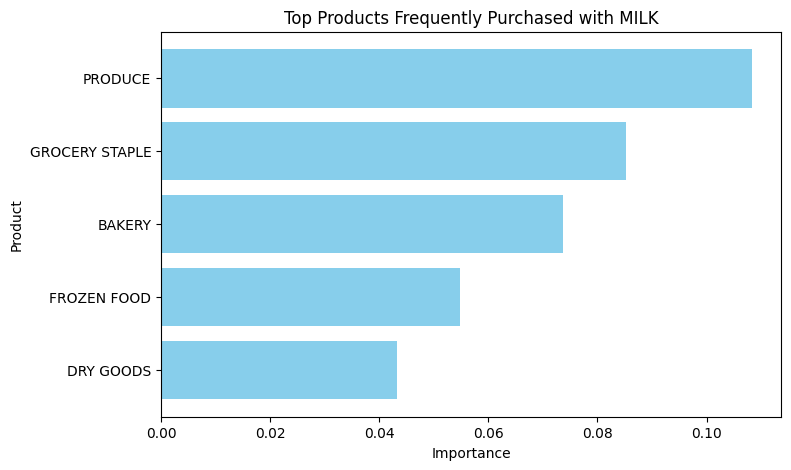

In [23]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(importance['Product'][:5], importance['Importance'][:5], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Product')
plt.title('Top Products Frequently Purchased with MILK')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


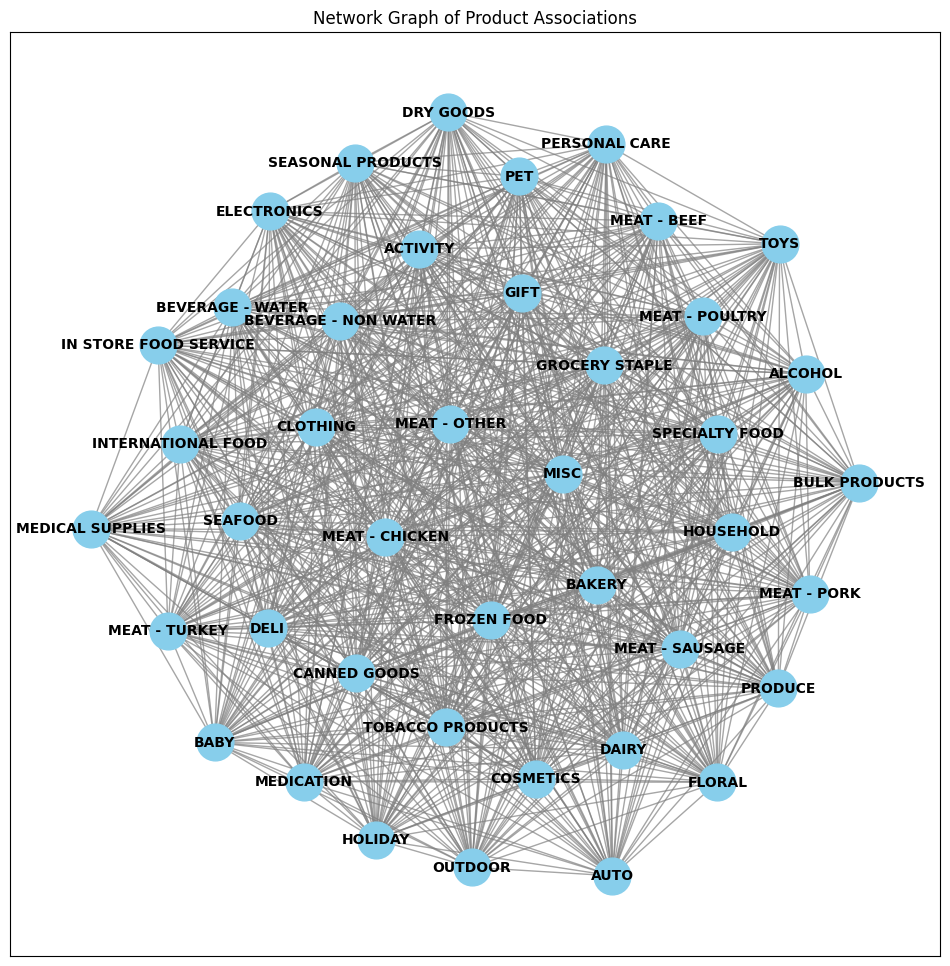

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Example association data: Co-occurrence between products
# Replace this with your actual co-occurrence or importance matrix
co_occurrence = basket_df.drop(columns=['HSHD_NUM', 'BASKET_NUM']).T.dot(
    basket_df.drop(columns=['HSHD_NUM', 'BASKET_NUM'])
)
co_occurrence.values[np.diag_indices_from(co_occurrence)] = 0  # Set diagonal to zero

# Create the graph
G = nx.Graph()

# Define a threshold for strong associations (e.g., >= 0.05 for co-occurrence)
threshold = 0.05
for product_a, product_b in co_occurrence.stack().index:
    weight = co_occurrence.loc[product_a, product_b]
    if weight > threshold:
        G.add_edge(product_a, product_b, weight=weight)

# Visualization settings
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3, seed=42)  # Position nodes
edges = G.edges(data=True)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1.0, alpha=0.7, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Add title and display
plt.title("Network Graph of Product Associations")
plt.show()


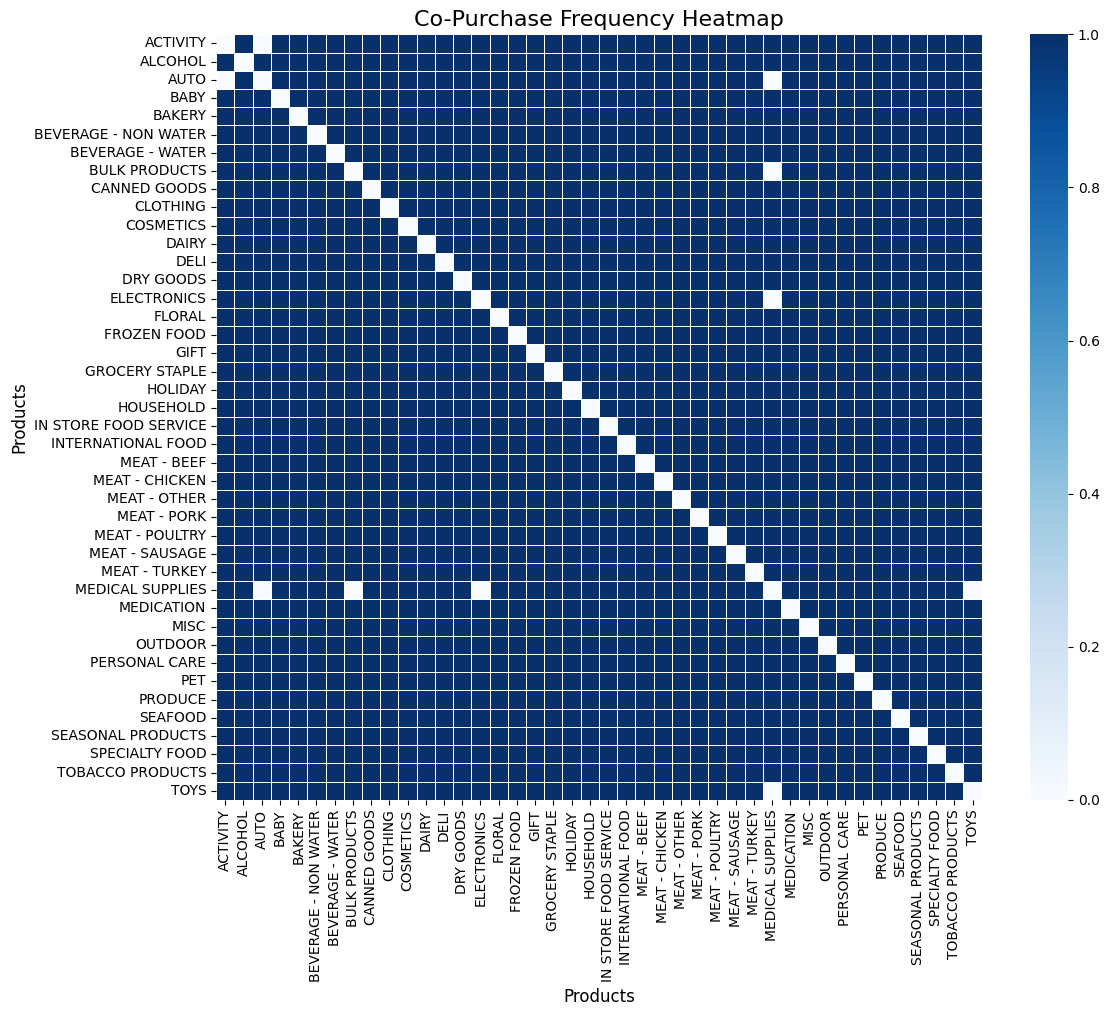

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate co-occurrence matrix (replace with your actual data)
co_occurrence = basket_df.drop(columns=['HSHD_NUM', 'BASKET_NUM']).T.dot(
    basket_df.drop(columns=['HSHD_NUM', 'BASKET_NUM'])
)
np.fill_diagonal(co_occurrence.values, 0)  # Set diagonal to zero

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    co_occurrence,
    cmap='Blues',
    linewidths=0.5,
    annot=False,  # Set to True to display co-occurrence values
    square=True,
    xticklabels=co_occurrence.columns,
    yticklabels=co_occurrence.columns
)

# Add title and labels
plt.title('Co-Purchase Frequency Heatmap', fontsize=16)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
